In [124]:
import numpy as np
from astropy.io import fits
from astropy import units as u
from astropy import coordinates as coord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.wcs import WCS, utils
from astropy.visualization.wcsaxes import WCSAxes
from astropy.io import fits
from matplotlib.patches import Rectangle
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from fit_str8_line import str8_line
from astropy.io import ascii

In [30]:
filename1 = '../DS9/rxj1713_suz_9pix.fits'
hdu1 = fits.open(filename1)
suzaku_data = hdu1[0].data
suzaku_header = hdu1[0].header

filename2 = '../DS9/rxj1713_hess_rebin.fits'
hdu2 = fits.open(filename2)
hess_data =hdu2[0].data
hess_header = hdu2[0].header

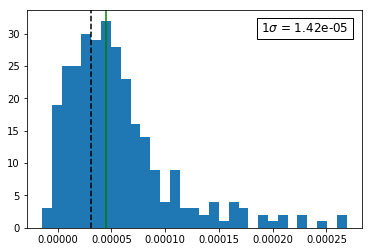

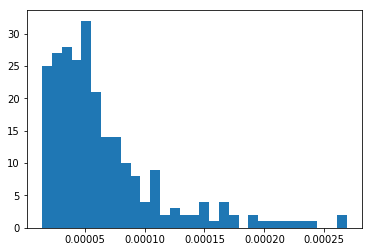

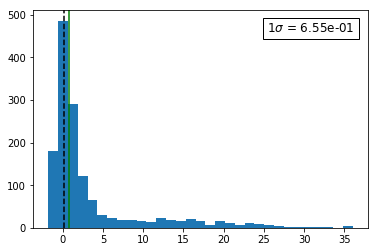

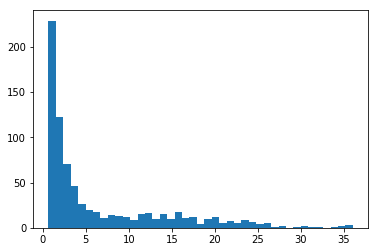

In [27]:
suzaku_data2 = suzaku_data[~np.isnan(suzaku_data)]
hess_data2 = hess_data[~np.isnan(hess_data)]
sigma_s = np.percentile(suzaku_data2,50) - np.percentile(suzaku_data2,68.26/2)
sigma_h = np.percentile(hess_data2,50) - np.percentile(hess_data2,68.26/2)
suzaku_data3 = [i for i in suzaku_data2 if i >= sigma_s]
hess_data3 = [i for i in hess_data2 if i >= sigma_h]

#use range option in plt.hist when you have nan in your data
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(suzaku_data2, bins=31)
plt.axvline(np.percentile(suzaku_data2,50), color = 'g', ls = "-")
plt.axvline(np.percentile(suzaku_data2,68.26/2.0), color = 'k', ls = "--")
plt.text(0.7, 0.9, '1$\sigma$ = {:1.2e}'.format(sigma_s), size=12, transform=ax.transAxes, bbox=dict(facecolor='white'))
plt.show()
plt.hist(suzaku_data3, bins=31)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(hess_data2, bins=31)
plt.axvline(np.percentile(hess_data2,50), color = 'g', ls = "-")
plt.axvline(np.percentile(hess_data2,68.26/2.0), color = 'k', ls = "--")
plt.text(0.7, 0.9, '1$\sigma$ = {:1.2e}'.format(sigma_h), size=12, transform=ax.transAxes, bbox=dict(facecolor='white'))
plt.show()
plt.hist(hess_data3, bins=41)
plt.show()



In [95]:
# order the fits data for each region according to ascending region number
s_data = []
h_data = []

s_data.append(suzaku_data[47:50,34:37].flatten())
s_data.append(suzaku_data[47:50,37:40].flatten())
s_data.append(suzaku_data[47:50,40:43].flatten())
s_data.append(suzaku_data[47:50,43:46].flatten())

s_data.append(suzaku_data[44:47,31:34].flatten())
s_data.append(suzaku_data[44:47,34:37].flatten())
s_data.append(suzaku_data[44:47,37:40].flatten())
s_data.append(suzaku_data[44:47,40:43].flatten())
s_data.append(suzaku_data[44:47,43:46].flatten())
s_data.append(suzaku_data[44:47,46:49].flatten())

s_data.append(suzaku_data[41:44,31:34].flatten())
s_data.append(suzaku_data[41:44,34:37].flatten())
s_data.append(suzaku_data[41:44,37:40].flatten())
s_data.append(suzaku_data[41:44,40:43].flatten())
s_data.append(suzaku_data[41:44,43:46].flatten())
s_data.append(suzaku_data[41:44,46:49].flatten())

s_data.append(suzaku_data[38:41,31:34].flatten())
s_data.append(suzaku_data[38:41,34:37].flatten())
s_data.append(suzaku_data[38:41,37:40].flatten())
s_data.append(suzaku_data[38:41,40:43].flatten())
s_data.append(suzaku_data[38:41,43:46].flatten())
s_data.append(suzaku_data[38:41,46:49].flatten())

s_data.append(suzaku_data[35:38,31:34].flatten())
s_data.append(suzaku_data[35:38,34:37].flatten())
s_data.append(suzaku_data[35:38,37:40].flatten())
s_data.append(suzaku_data[35:38,40:43].flatten())
s_data.append(suzaku_data[35:38,43:46].flatten())

s_data.append(suzaku_data[32:35,37:40].flatten())
s_data.append(suzaku_data[32:35,40:43].flatten())


h_data.append(hess_data[47:50,34:37].flatten())
h_data.append(hess_data[47:50,37:40].flatten())
h_data.append(hess_data[47:50,40:43].flatten())
h_data.append(hess_data[47:50,43:46].flatten())

h_data.append(hess_data[44:47,31:34].flatten())
h_data.append(hess_data[44:47,34:37].flatten())
h_data.append(hess_data[44:47,37:40].flatten())
h_data.append(hess_data[44:47,40:43].flatten())
h_data.append(hess_data[44:47,43:46].flatten())
h_data.append(hess_data[44:47,46:49].flatten())

h_data.append(hess_data[41:44,31:34].flatten())
h_data.append(hess_data[41:44,34:37].flatten())
h_data.append(hess_data[41:44,37:40].flatten())
h_data.append(hess_data[41:44,40:43].flatten())
h_data.append(hess_data[41:44,43:46].flatten())
h_data.append(hess_data[41:44,46:49].flatten())

h_data.append(hess_data[38:41,31:34].flatten())
h_data.append(hess_data[38:41,34:37].flatten())
h_data.append(hess_data[38:41,37:40].flatten())
h_data.append(hess_data[38:41,40:43].flatten())
h_data.append(hess_data[38:41,43:46].flatten())
h_data.append(hess_data[38:41,46:49].flatten())

h_data.append(hess_data[35:38,31:34].flatten())
h_data.append(hess_data[35:38,34:37].flatten())
h_data.append(hess_data[35:38,37:40].flatten())
h_data.append(hess_data[35:38,40:43].flatten())
h_data.append(hess_data[35:38,43:46].flatten())

h_data.append(hess_data[32:35,37:40].flatten())
h_data.append(hess_data[32:35,40:43].flatten())

#remove x-ray points with nan or that are noisey and corresponding hess data points
n = len(s_data[0])
for i in range(29):
    k = 0
    for j in range(n):
        if np.isfinite(s_data[i][k]) == False or s_data[i][k] < sigma_s:
            s_data[i] = np.delete(s_data[i], k, axis=0)
            h_data[i] = np.delete(h_data[i], k, axis=0)
            k = k - 1
        k = k + 1
s_data[27]

array([1.4927626e-05, 1.5272182e-05], dtype=float32)

In [125]:
r = []
p = []
sig2 = []
sig3 = []
s = []
sp = []
for i in range(29):
    r.append(pearsonr(h_data[i],s_data[i])[0]) 
    p.append(pearsonr(h_data[i],s_data[i])[1])
    s.append(spearmanr(h_data[i],s_data[i])[0])
    sp.append(spearmanr(h_data[i],s_data[i])[1])
    if p[i] <(100 - 99.73)/100: #see if 3sigma confident
        sig3.append("Yes")
    else:
        sig3.append("No")
    if p[i] <(100 - 95.44)/100:
        sig2.append("Yes")
    else:
        sig2.append("No")
    print("reg.{}: r = {:.2f}, p = {:.4f}, s = {:.2f}, sp = {:.4f}, 2sig={}, 3sig={}".format(i+1,r[i],p[i],s[i],sp[i],sig2[i],sig3[i]))
    
    label = "r = {:.2f}, p = {:.4f}".format(r[i],p[i])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(h_data[i], s_data[i])
#     plt.errorbar(h_data[i], s_data[i], xerr = h_error[i], yerr = s_error[i], fmt = "o")
    plt.text(0.1,0.9,label, transform=ax.transAxes, bbox=dict(facecolor='white', alpha = 0.7))
    plt.xlabel("$\gamma$-ray Excess Counts")
    plt.ylabel("X-ray Excess Counts")
    plt.ylim(0,1.1*np.max(s_data[i]))
    plt.title("Region {:d}".format(i+1))
    plt.savefig("correlation_study_data/plots2/suzakuNR_gam_2_reg" + str(i+1) + ".pdf")
    plt.close()

reg.1: r = 0.81, p = 0.0147, s = 0.81, sp = 0.0149, 2sig=Yes, 3sig=No
reg.2: r = 0.93, p = 0.0026, s = 0.96, sp = 0.0005, 2sig=Yes, 3sig=Yes
reg.3: r = 0.60, p = 0.1167, s = 0.60, sp = 0.1195, 2sig=No, 3sig=No
reg.4: r = 0.95, p = 0.0013, s = 0.89, sp = 0.0068, 2sig=Yes, 3sig=Yes
reg.5: r = 0.62, p = 0.3830, s = 0.80, sp = 0.2000, 2sig=No, 3sig=No
reg.6: r = 0.39, p = 0.3451, s = 0.40, sp = 0.3199, 2sig=No, 3sig=No
reg.7: r = -0.44, p = 0.2343, s = -0.52, sp = 0.1544, 2sig=No, 3sig=No
reg.8: r = 0.62, p = 0.1016, s = 0.31, sp = 0.4556, 2sig=No, 3sig=No
reg.9: r = 0.86, p = 0.0030, s = 0.93, sp = 0.0002, 2sig=Yes, 3sig=No
reg.10: r = 0.87, p = 0.0024, s = 0.85, sp = 0.0037, 2sig=Yes, 3sig=Yes
reg.11: r = 0.82, p = 0.0447, s = 0.71, sp = 0.1108, 2sig=Yes, 3sig=No
reg.12: r = 0.60, p = 0.0893, s = 0.63, sp = 0.0671, 2sig=No, 3sig=No
reg.13: r = 0.77, p = 0.0150, s = 0.72, sp = 0.0298, 2sig=Yes, 3sig=No
reg.14: r = 0.20, p = 0.5994, s = 0.23, sp = 0.5457, 2sig=No, 3sig=No
reg.15: r = 0.69,

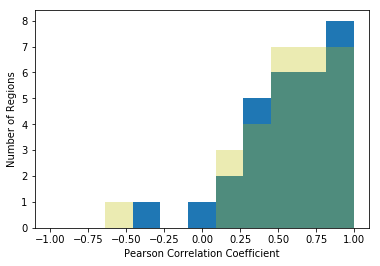

In [130]:
plt.hist(r,11, range=[-1,1])
plt.hist(s,11, range=[-1,1], color = 'y', alpha = 0.3)
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Number of Regions")
plt.show()

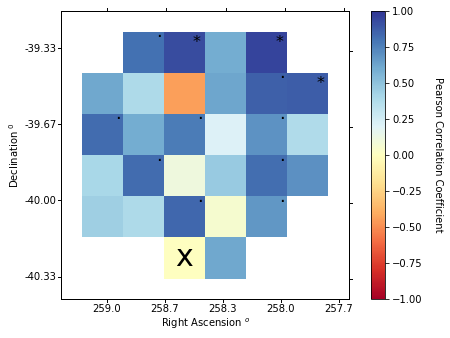

In [121]:
hdu = fits.open('fitsfiles/rxj1713_pearson_suz_mHI.fits')
image_data = hdu[0].data
image_header = hdu[0].header

for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
        if image_data[i][j] == -10:
            image_data[i][j] = np.nan
            
reg = r
image_data[6][2] = reg[0]
image_data[6][3] = reg[1]
image_data[6][4] = reg[2]
image_data[6][5] = reg[3]

image_data[5][1] = reg[4]
image_data[5][2] = reg[5]
image_data[5][3] = reg[6]
image_data[5][4] = reg[7]
image_data[5][5] = reg[8]
image_data[5][6] = reg[9]

image_data[4][1] = reg[10]
image_data[4][2] = reg[11]
image_data[4][3] = reg[12]
image_data[4][4] = reg[13]
image_data[4][5] = reg[14]
image_data[4][6] = reg[15]

image_data[3][1] = reg[16]
image_data[3][2] = reg[17]
image_data[3][3] = reg[18]
image_data[3][4] = reg[19]
image_data[3][5] = reg[20]
image_data[3][6] = reg[21]

image_data[2][1] = reg[22]
image_data[2][2] = reg[23]
image_data[2][3] = reg[24]
image_data[2][4] = reg[25]
image_data[2][5] = reg[26]

image_data[1][3] = 0.0 #this region only had 2 data points after removing noise etc
image_data[1][4] = reg[28]


fig = plt.figure()

wcs = WCS(image_header)
ax = WCSAxes(fig, [0,0,1,1], wcs= wcs)
fig.add_axes(ax)

ra = ax.coords[0]
dec = ax.coords[1]

#format axes
ra.set_major_formatter('d.d')
dec.set_major_formatter('d.dd')

plt.xlabel('Right Ascension $^o$')
plt.ylabel('Declination $^0$')

plt.imshow(image_data, cmap=plt.cm.RdYlBu, vmin =-1, vmax = 1)
cbar = plt.colorbar()
cbar.set_label('Pearson Correlation Coefficient', rotation=270, labelpad=20)

plt.xlim(0,7)
plt.ylim(0,7) #flip y-axis

#Regions with significance > 2sigma
plt.text(3.2,6.13,'*',fontsize=16)
plt.text(5.2,6.13,'*',fontsize=16)
plt.text(6.2,5.13,'*',fontsize=16)

plt.text(2.3,6.37,'.',fontsize=18)
plt.text(5.3,5.37,'.',fontsize=18)
plt.text(1.3,4.37,'.',fontsize=18)
plt.text(3.3,4.37,'.',fontsize=18)
plt.text(5.3,4.37,'.',fontsize=18)
plt.text(2.3,3.37,'.',fontsize=18)
plt.text(5.3,3.37,'.',fontsize=18)
plt.text(3.3,2.37,'.',fontsize=18)
plt.text(5.3,2.37,'.',fontsize=18)

plt.text(2.76,0.81,'x',fontsize=30)


plt.savefig('correlation_study_data/output/pearsonmap_gam_suz.ps')

plt.show()